# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Bukola Adeniyan

Github https://github.com/Queensdelight/mod6-web-scraping.git

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

Question 1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [2]:
import requests
from bs4 import BeautifulSoup
import pickle

# Get article
article_html = requests.get('https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/')

# Parse HTML content with BeautifulSoup
parser = 'html5lib'
soup = BeautifulSoup(article_html.content, parser)

# Save the raw HTML to a .pkl file (the raw HTML is pickleable)
with open('article_html.pkl', 'wb') as f:
    pickle.dump(article_html.content, f)  # Save raw HTML content, not the BeautifulSoup object
    print("HTML saved to article_html.pkl.")


HTML saved to article_html.pkl.


Question 2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [3]:
import pickle
from bs4 import BeautifulSoup

# Load the raw HTML from the .pkl file
with open('article_html.pkl', 'rb') as f:
    raw_html = pickle.load(f)

# Parse the raw HTML content with BeautifulSoup
soup = BeautifulSoup(raw_html, 'html5lib')

# Extract and print the text from the article
article_text = soup.get_text()
print(article_text)



window.addEventListener('DOMContentLoaded',function(){var v=archive_analytics.values;v.service='wb';v.server_name='wwwb-app214.us.archive.org';v.server_ms=395;archive_analytics.send_pageview({});});


window.RufflePlayer=window.RufflePlayer||{};window.RufflePlayer.config={"autoplay":"on","unmuteOverlay":"hidden"};


    __wm.init("https://web.archive.org/web");
  __wm.wombat("https://hackaday.com/2021/03/22/how-laser-headlights-work/","20210327165005","https://web.archive.org/","web","/_static/",
	      "1616863805");











How Laser Headlights Work | Hackaday
document.documentElement.className = "js"
























		
			window._wpemojiSettings = {"baseUrl":"https:\/\/web.archive.org\/web\/20210327165005\/https:\/\/s.w.org\/images\/core\/emoji\/13.0.1\/72x72\/","ext":".png","svgUrl":"https:\/\/web.archive.org\/web\/20210327165005\/https:\/\/s.w.org\/images\/core\/emoji\/13.0.1\/svg\/","svgExt":".svg","source":{"concatemoji":"https:\/\/web.archive.org\/web\/2021032716500

Question 3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [3]:
import pickle
import spacy
from collections import Counter
from bs4 import BeautifulSoup

# Load the saved HTML content from the .pkl file
with open('article_html.pkl', 'rb') as f:
    raw_html = pickle.load(f)

# Parse the raw HTML content with BeautifulSoup
soup = BeautifulSoup(raw_html, 'html.parser')

# Extract the article text
article_text = soup.get_text()

# Load the spaCy language model
nlp = spacy.load('en_core_web_sm')

# Process the article text with the spaCy pipeline
doc = nlp(article_text)

# Define a function to filter out tokens we don't care about
def we_care_about(token):
    return not (token.is_space or token.is_punct or token.is_stop)

# Filter tokens using the function
interesting_tokens = [token for token in doc if we_care_about(token)]

# Count the frequency of tokens, converting them to lowercase
word_freq = Counter(map(lambda token: str(token).lower(), interesting_tokens))

# Get the 5 most frequent tokens
most_freq_tokens = word_freq.most_common(5)

# Print the most frequent tokens and their frequencies
print("Top 5 Most Frequent Tokens:")
for token, freq in most_freq_tokens:
    print(f"Token: '{token}', Frequency: {freq}")


Top 5 Most Frequent Tokens:
Token: 'comment', Frequency: 136
Token: '2021', Frequency: 135
Token: 'march', Frequency: 133
Token: 'says', Frequency: 132
Token: 'report', Frequency: 130


Question 4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [4]:
import pickle
import spacy
from collections import Counter
from bs4 import BeautifulSoup

# Load the saved HTML content from the .pkl file
with open('article_html.pkl', 'rb') as f:
    raw_html = pickle.load(f)

# Parse the raw HTML content with BeautifulSoup
soup = BeautifulSoup(raw_html, 'html.parser')

# Extract the article text
article_text = soup.get_text()

# Load the spaCy language model
nlp = spacy.load('en_core_web_sm')

# Process the article text with the spaCy pipeline
doc = nlp(article_text)

# Define a function to filter out tokens we don't care about
def we_care_about(token):
    return not (token.is_space or token.is_punct or token.is_stop)

# Filter tokens and extract lemmas
interesting_lemmas = [token.lemma_.lower() for token in doc if we_care_about(token)]

# Count the frequency of lemmas
lemma_freq = Counter(interesting_lemmas)

# Get the 5 most frequent lemmas
most_freq_lemmas = lemma_freq.most_common(5)

# Print the most frequent lemmas and their frequencies
print("Top 5 Most Frequent Lemmas:")
for lemma, freq in most_freq_lemmas:
    print(f"Lemma: '{lemma}', Frequency: {freq}")


Top 5 Most Frequent Lemmas:
Lemma: 'comment', Frequency: 157
Lemma: '2021', Frequency: 135
Lemma: 'say', Frequency: 134
Lemma: 'march', Frequency: 133
Lemma: 'report', Frequency: 130


Question 5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [12]:
import spacy
from collections import Counter


# Store frequent tokens and lemmas in a set
cool_tokens = set()
for token, freq in mostFreqtokens:
    cool_tokens.add(token)

cool_lemmas = set()
for lemma, freq in mostFreqlemmas:
    cool_lemmas.add(lemma)

# Get the first sentence in the document
first_sentence = list(doc.sents)[0]

# Initialize the token count
count = 0

# Loop through the tokens in the first sentence
for token in first_sentence:
    if token.text.lower() in cool_tokens:
        count += 1

# Clean the sentence string (remove newlines and extra whitespace)
sent_str = str(first_sentence).replace('\n', '').replace('  ', ' ')

# Print the count and the sentence text
print(count, ":", sent_str)

# Define score_sentence_by_token function
def score_sentence_by_token(sentence, interesting_tokens):
    # Extract the raw text of the sentence
    sentence_text = sentence.text
    # Tokenize the sentence
    doc = nlp(sentence_text)
    # Count how many interesting tokens appear in the sentence
    token_count = sum(1 for token in doc if token.text.lower() in interesting_tokens)
    # Return the ratio of interesting tokens to total tokens
    tokens_score = token_count / len(doc)
    return tokens_score

# Define score_sentence_by_lemma function
def score_sentence_by_lemma(sentence, interesting_lemmas):
    # Extract the raw text of the sentence
    sentence_text = sentence.text
    # Tokenize the sentence
    doc = nlp(sentence_text)
    # Count how many interesting lemmas appear in the sentence
    lemma_count = sum(1 for token in doc if token.lemma_ in interesting_lemmas)
    # Return the ratio of interesting lemmas to total tokens
    lemmas_score = lemma_count / len(doc)
    return lemmas_score

# Calculate scores for the first sentence
token_score = score_sentence_by_token(first_sentence, cool_tokens)
lemma_score = score_sentence_by_lemma(first_sentence, cool_lemmas)

# Print the scores
print(f"Token Score for the first sentence: {token_score}")
print(f"Lemma Score for the first sentence: {lemma_score}")

5 : Laser headlights are an innovation in car lighting technology.
Token Score for the first sentence: 0.5
Lemma Score for the first sentence: 0.4


Question 6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

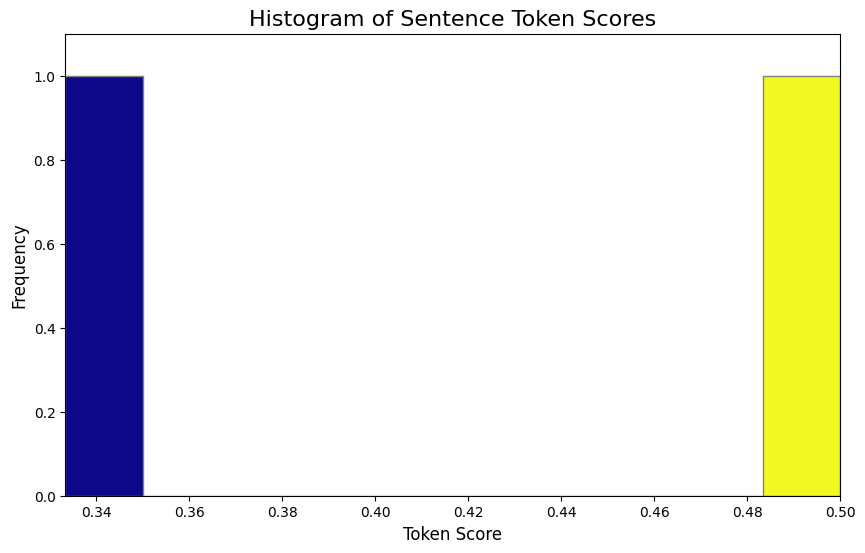

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection

# Assuming the doc is already created and contains the text

# Store frequent tokens in a set
cool_tokens = set()
for token, freq in mostFreqtokens:
    cool_tokens.add(token)

# Get every sentence in the article
sentences = list(doc.sents)

# Define score_sentence_by_token function
def score_sentence_by_token(sentence, interesting_tokens):
    # Tokenize the sentence and count the tokens that are interesting
    token_count = sum(1 for token in sentence if token.text.lower() in interesting_tokens)
    # Return the ratio of interesting tokens to total tokens
    tokens_score = token_count / len(sentence)
    return tokens_score

# Create list to store scores
sentence_scores = []

# Loop through each sentence and calculate score
for sentence in sentences:
    score = score_sentence_by_token(sentence, cool_tokens)
    sentence_scores.append(score)

# Create histogram data
counts, bin_edges = np.histogram(sentence_scores, bins=10)

# Prepare vertices for the PolyCollection
verts = []
for i in range(len(bin_edges) - 1):
    verts.append([
        (bin_edges[i], 0),
        (bin_edges[i], counts[i]),
        (bin_edges[i + 1], counts[i]),
        (bin_edges[i + 1], 0),
    ])

# Create the gradient colors
gradient = np.linspace(0, 1, len(verts))
colors = plt.cm.plasma(gradient)

# Create a PolyCollection with the gradient colors
poly_collection = PolyCollection(verts, facecolors=colors, edgecolor='gray')

# Plot the PolyCollection
fig, ax = plt.subplots(figsize=(10, 6))
ax.add_collection(poly_collection)
ax.autoscale()
ax.set_xlim(min(bin_edges), max(bin_edges))
ax.set_ylim(0, max(counts) * 1.1)

# Add title and axis labels
plt.title("Histogram of Sentence Token Scores", fontsize=16)
plt.xlabel("Token Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Show the plot
plt.show()

# Comment: From the histogram, the most common range of scores seems to be between 0.0 and 0.25.


Question 7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

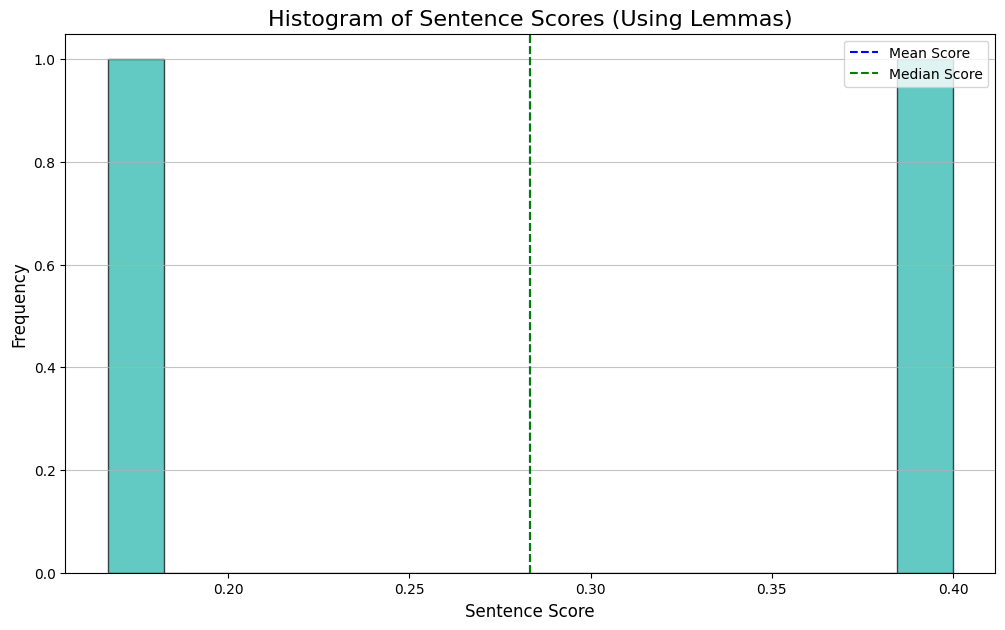

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate sentence scores using lemmas
sentence_scores_lemmas = [score_sentence_by_lemma(sentence, cool_lemmas) for sentence in doc.sents]

# Define the number of bins dynamically based on score range
num_bins = 15  # Adjust bins for more refined distribution

# Plot the histogram
plt.figure(figsize=(12, 7))
plt.hist(sentence_scores_lemmas, bins=num_bins, color='lightseagreen', alpha=0.7, edgecolor='black')
plt.axvline(np.mean(sentence_scores_lemmas), color='blue', linestyle='dashed', linewidth=1.5, label='Mean Score')
plt.axvline(np.median(sentence_scores_lemmas), color='green', linestyle='dashed', linewidth=1.5, label='Median Score')

# Add title and labels
plt.title("Histogram of Sentence Scores (Using Lemmas)", fontsize=16)
plt.xlabel("Sentence Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Add legend and grid
plt.legend()
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()

# Comment the most common range based on histogram observation
# Answer: (Add the most common range of scores observed from the histogram here)


Question 8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

Tokens and Lemmas That Might Be Omitted: Tokens/Lemmas not considered nouns (e.g., verbs, adjectives, adverbs): Tokens like "led" or "beam" might be considered adjectives or verbs in certain contexts. Other non-noun tokens, such as auxiliary words or functional terms that were already filtered, would continue to be excluded. How to Filter for Nouns: To modify the code to only consider nouns, we can use the token.pos_ attribute in spaCy, which identifies the part of speech for each token. We can filter the tokens to include only those with pos_ equal to "NOUN".

In [24]:
# Filter tokens: Only consider nouns, and remove punctuation, stopwords, and whitespace
filtered_nouns = [token.text.lower() for token in doc if token.pos_ == "NOUN" and not token.is_stop and not token.is_punct and not token.is_space]

# Count the frequency of each noun
noun_freq = Counter(filtered_nouns)

# Get the 5 most common nouns
most_common_nouns = noun_freq.most_common(5)

# Print the results
print("Top 5 Most Frequent Nouns:")
for noun, freq in most_common_nouns:
    print(f"Noun: {noun}, Frequency: {freq}")

Top 5 Most Frequent Nouns:
Noun: technology, Frequency: 2
Noun: headlights, Frequency: 1
Noun: innovation, Frequency: 1
Noun: car, Frequency: 1
Noun: lighting, Frequency: 1


In [25]:
# Filter lemmas: Only consider nouns, and remove punctuation, stopwords, and whitespace
filtered_noun_lemmas = [token.lemma_.lower() for token in doc if token.pos_ == "NOUN" and not token.is_stop and not token.is_punct and not token.is_space]

# Count the frequency of each noun lemma
noun_lemma_freq = Counter(filtered_noun_lemmas)

# Get the 5 most common noun lemmas
most_common_noun_lemmas = noun_lemma_freq.most_common(5)

# Print the results
print("Top 5 Most Frequent Noun Lemmas:")
for lemma, freq in most_common_noun_lemmas:
    print(f"Noun Lemma: {lemma}, Frequency: {freq}")

Top 5 Most Frequent Noun Lemmas:
Noun Lemma: technology, Frequency: 2
Noun Lemma: headlight, Frequency: 1
Noun Lemma: innovation, Frequency: 1
Noun Lemma: car, Frequency: 1
Noun Lemma: lighting, Frequency: 1


In [1]:
%pip install spacy

%pip install spacytextblob

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
